# Milestone 1 - Data Visualization Complementary Views 

## Author - Ana Javed



## Instructions
1) Generate a clear statement problem and provide location for dataset

2) Provide a clear solution to the problem for a non-technical audience

3) Visually explore the data to generate insight and include summary statistics

    - scatter plots showing key relationships you have found in the dataset. 
        Beware of over-plotting. 
    - bar, box or violin plots for various categorical groups within the dataset. 
    - Faceted plots to show diffences for different groups with in the data. 
    - Other plot types you find useful; heatmaps, histograms, etc. 
    - All plots should use methods that will aid in viewer perception.

## Problem

In 2019, the World Health Organization identified Ischemic Heart Disease as the leading cause of death worldwide. Ischemic Heart Disease is a non-communicable condition that is preventable with proper exercise, dietary changes, and access to education and resources. 

(Source: https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death)

The University of California Irving has publicly made available an echocardiogram dataset that displays information whether a patient survives one year after a heart attack occurs. 

From analyzing this data, I would like to identify key factors that determines whether a patient can live up to one year after experiencing a heart attack. The factors I will be exploring include: a patient's age, presence of pericardial effusion, left ventricular end-diastolic dimension, and wall-motion index. 

Data Source and Documentation: https://archive.ics.uci.edu/ml/datasets/Echocardiogram


## Process

To solve this problem, I am going to analyze the relationships of the different variables to each other, and whether or not there is a relationship with a patient living a year after a heart attack.

Part of this analysis includes creating a variety of visualizations - from bar plots to facet plots - to examine the different variables relationships. Before I can create any plots, I need to create a few additional columns that categorize the data for better end-user readability. I also need to clean up the data, and will replace missing values with the meadian value of the column (if applicable). 

In [1]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Declaring inline visualizations 
%matplotlib inline


In [2]:
## Reading in the Hepatitis dataset from University of California Irvine 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram/echocardiogram.data"
Echo = pd.read_csv(url, header = None, sep = '\n')
Echo = Echo[0].str.split(',', expand=True)

## Assigning Readable Column Names 
Echo.columns = ['Survival', 'StillAlive', 'AgeAtHeartAttack', 
                'PericardialEffusion', 'Fractional-shortening',
                'EPSS', 'LVDD', 'WallMotionScore', 'WallMotionIndex',
                'Mult', 'Name', 'Group', 'AliveAtOneYear', 'None'
               ]

## There is an error in the dataset where an extra column exists on line 50. 
## To account for this, I reset the values for the row  
Echo.loc[49, :] = ['?','?',77,'?','?','?','?','?',2,'?','name',2,'?', None]        

## Dropping columns not needed.
## Name, Mult, & Group columns were identified in data documentation as not needed 
Echo = Echo.drop(["None", "Name", "Mult", "Group"], axis = 1)

## Creating counts Column for visualizations 
Echo['counts'] = 1

In [3]:
## Converting Columns to Numeric and
## Replacing missing values "?" with column median 

Echo.loc[:,'Survival'] = pd.to_numeric(Echo.loc[:,'Survival'], errors='coerce')  
HasNan1 = np.isnan(Echo.loc[:,'Survival'])
Echo.loc[HasNan1,'Survival'] = np.nanmedian(Echo.loc[:,'Survival'])

Echo.loc[:,'StillAlive'] = pd.to_numeric(Echo.loc[:,'StillAlive'], errors='coerce')    
HasNan1 = np.isnan(Echo.loc[:,'StillAlive'])
Echo.loc[HasNan1,'StillAlive'] = np.nanmedian(Echo.loc[:,'StillAlive'])

Echo.loc[:,'AgeAtHeartAttack'] = pd.to_numeric(Echo.loc[:,'AgeAtHeartAttack'], errors='coerce')
HasNan1 = np.isnan(Echo.loc[:,'AgeAtHeartAttack'])
Echo.loc[HasNan1,'AgeAtHeartAttack'] = np.nanmedian(Echo.loc[:,'AgeAtHeartAttack'])

Echo.loc[:,'PericardialEffusion'] = pd.to_numeric(Echo.loc[:,'PericardialEffusion'], errors='coerce')    
HasNan1 = np.isnan(Echo.loc[:,'PericardialEffusion'])
Echo.loc[HasNan1,'PericardialEffusion'] = np.nanmedian(Echo.loc[:,'PericardialEffusion'])

Echo.loc[:,'Fractional-shortening'] = pd.to_numeric(Echo.loc[:,'Fractional-shortening'], errors='coerce')    
HasNan1 = np.isnan(Echo.loc[:,'Fractional-shortening'])
Echo.loc[HasNan1,'Fractional-shortening'] = np.nanmedian(Echo.loc[:,'Fractional-shortening'])

Echo.loc[:,'EPSS'] = pd.to_numeric(Echo.loc[:,'EPSS'], errors='coerce')    
HasNan1 = np.isnan(Echo.loc[:,'EPSS'])
Echo.loc[HasNan1,'EPSS'] = np.nanmedian(Echo.loc[:,'EPSS'])

Echo.loc[:,'LVDD'] = pd.to_numeric(Echo.loc[:,'LVDD'], errors='coerce')    
HasNan1 = np.isnan(Echo.loc[:,'LVDD'])
Echo.loc[HasNan1,'LVDD'] = np.nanmedian(Echo.loc[:,'LVDD'])

Echo.loc[:,'WallMotionScore'] = pd.to_numeric(Echo.loc[:,'WallMotionScore'], errors='coerce') 
HasNan1 = np.isnan(Echo.loc[:,'WallMotionScore'])
Echo.loc[HasNan1,'WallMotionScore'] = np.nanmedian(Echo.loc[:,'WallMotionScore'])

Echo.loc[:,'WallMotionIndex'] = pd.to_numeric(Echo.loc[:,'WallMotionIndex'], errors='coerce')    
HasNan1 = np.isnan(Echo.loc[:,'WallMotionIndex'])
Echo.loc[HasNan1,'WallMotionIndex'] = np.nanmedian(Echo.loc[:,'WallMotionIndex'])

Echo.loc[:,'AliveAtOneYear'] = pd.to_numeric(Echo.loc[:,'AliveAtOneYear'], errors='coerce')    
HasNan1 = np.isnan(Echo.loc[:,'AliveAtOneYear'])
Echo.loc[HasNan1,'AliveAtOneYear'] = np.nanmedian(Echo.loc[:,'AliveAtOneYear'])
    

In [4]:
## Binning Age column into a categorical variable 
Echo.loc[:, "Age_Decade"] = Echo.loc[:, "AgeAtHeartAttack"]

# Creating the new categories based on age: 10s, 20s, 30s, 40s, 50s...etc. 
for each in Echo.loc[:, "Age_Decade"].unique():
    # print(each)
    if len(str(each)) >1:
        age_bucket = str(each)[0] + '0s'
        Echo.loc[ Echo.loc[:, "Age_Decade"] == each, "Age_Decade"] = age_bucket
    elif len(str(each)) <= 1:
        age_bucket = '10s'
        Echo.loc[ Echo.loc[:, "Age_Decade"] == each, "Age_Decade"] = age_bucket
        
# Consolidating the following categories in "Age_Decade"
Echo.loc[Echo.loc[:, "Age_Decade"] == "10s", "Age_Decade"] = "<20"

# print(Echo.loc[:,'Age_Decade'].value_counts())  # Age_Decade Value Counts 

In [5]:
# Exploring the Dataframe

print(Echo.shape)  # Dimensions of the Dataframe 

Echo.describe()    # Summary Statistics 


(132, 12)


,Survival,StillAlive,AgeAtHeartAttack,PericardialEffusion,Fractional-shortening,EPSS,LVDD,WallMotionScore,WallMotionIndex,AliveAtOneYear,counts
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.00000,132.000000,132.0
mean,22.202879,0.325758,62.890371,0.181818,0.216023,12.032409,4.753727,14.424848,1.38153,0.181818,1.0
std,15.737575,0.470443,8.243728,0.387164,0.104216,6.945299,0.775895,4.941928,0.45186,0.387164,0.0
min,0.030000,0.000000,35.000000,0.000000,0.010000,0.000000,2.320000,2.000000,1.00000,0.000000,1.0
25%,8.625000,0.000000,57.750000,0.000000,0.150000,7.575000,4.290000,11.375000,1.00000,0.000000,1.0
50%,23.500000,0.000000,62.000000,0.000000,0.205000,11.000000,4.650000,14.000000,1.22200,0.000000,1.0
75%,33.000000,1.000000,67.250000,0.000000,0.262500,14.850000,5.252500,16.125000,1.52250,0.000000,1.0
max,57.000000,1.000000,86.000000,1.000000,0.610000,40.000000,6.780000,39.000000,3.00000,1.000000,1.0


60s    64
50s    37
70s    22
80s     4
40s     4
30s     1
Name: Age_Decade, dtype: int64

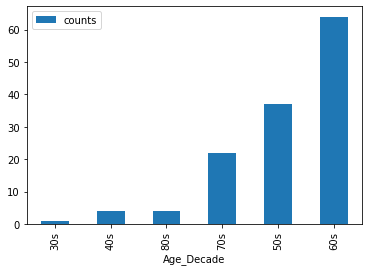

In [6]:
# Bar Plot of Patients with Heart Attacks 

Echo.loc[:, ['Age_Decade', 'counts']].groupby(['Age_Decade']).agg('count').sort_values('counts').plot.bar()


# Printing Unique Counts of Each Age Decade

Echo.loc[:, "Age_Decade"].value_counts()

<AxesSubplot:xlabel='AliveAtOneYear'>

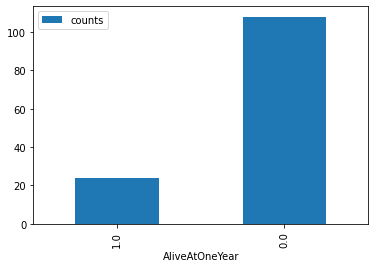

In [7]:
# Bar Plot of Heart Attack Patients who are Alive/Dead At One Year

Echo.loc[:, ['AliveAtOneYear', 'counts']].groupby(['AliveAtOneYear']).agg('count').sort_values('counts').plot.bar()

(-0.1, 0.7)

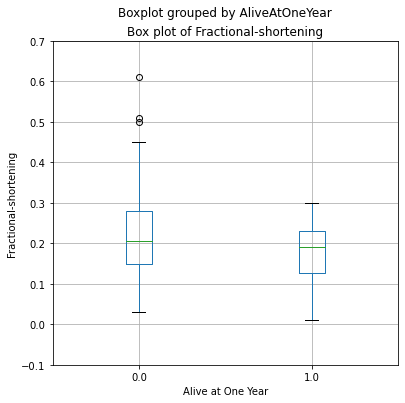

In [8]:
## Box Plot of Fractional Shortening 

fig = plt.figure(figsize=(6, 6)) # Define plot area

ax = fig.gca() # Define axis 
Echo.loc[:,['Fractional-shortening', "AliveAtOneYear"]].boxplot(by = 'AliveAtOneYear', ax = ax)

ax.set_title('Box plot of Fractional-shortening') # Give the plot a main title
ax.set_ylabel('Fractional-shortening')# Set text for y axis
ax.set_xlabel('Alive at One Year')# Set text for x axis
ax.set_ylim(-0.1, 0.7) # Set the limits of the y axis

(-5.0, 45.0)

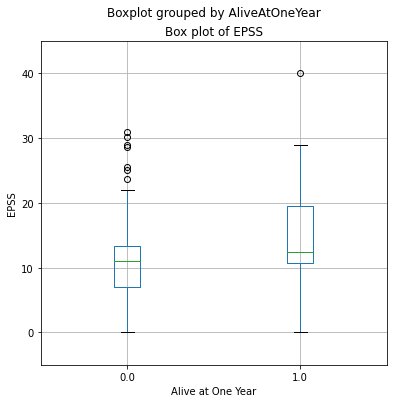

In [9]:
## Box Plot of EPSS

fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca() # Define axis 

Echo.loc[:,['EPSS', "AliveAtOneYear"]].boxplot(by = 'AliveAtOneYear', ax = ax)


ax.set_title('Box plot of EPSS') # Give the plot a main title
ax.set_ylabel('EPSS')# Set text for y axis
ax.set_xlabel('Alive at One Year')# Set text for x axis
ax.set_ylim(-5, 45) # Set the limits of the y axis

Text(0, 0.5, 'Alive At One Year')

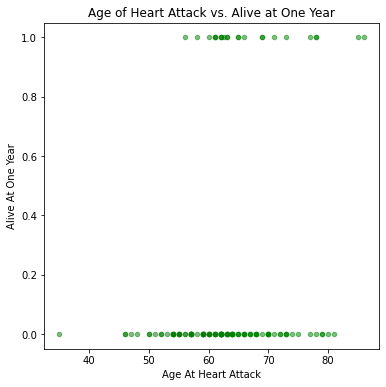

In [10]:
## Scatter Plot: Age of Heart Attack by Alive At One Year 

ax = plt.figure(figsize=(6, 6)).gca() # define axis

Echo.plot.scatter(x = 'AgeAtHeartAttack', 
                  y = 'AliveAtOneYear', 
                  ax = ax, 
                  alpha = .5, 
                  color = 'Green') # Generating Plot 

ax.set_title('Age of Heart Attack vs. Alive at One Year') # Give the plot a main title
ax.set_xlabel('Age At Heart Attack')# Set text for y axis
ax.set_ylabel('Alive At One Year') # Set text for x axis 

Text(0, 0.5, 'Alive At One Year')

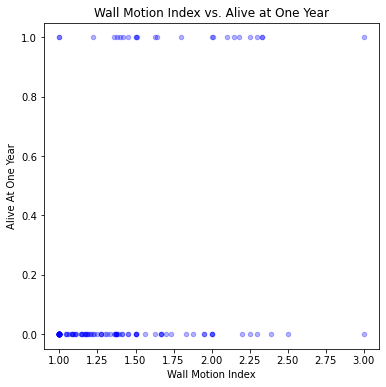

In [11]:
## Scatter Plot: Age of Heart Attack by Alive At One Year 

ax = plt.figure(figsize=(6, 6)).gca() # define axis

Echo.plot.scatter(x = 'WallMotionIndex', 
                  y = 'AliveAtOneYear', 
                  ax = ax, 
                  alpha = .3, 
                  color = 'Blue') # Generating Plot 

ax.set_title('Wall Motion Index vs. Alive at One Year') # Give the plot a main title
ax.set_xlabel('Wall Motion Index')# Set text for y axis
ax.set_ylabel('Alive At One Year') # Set text for x axis 

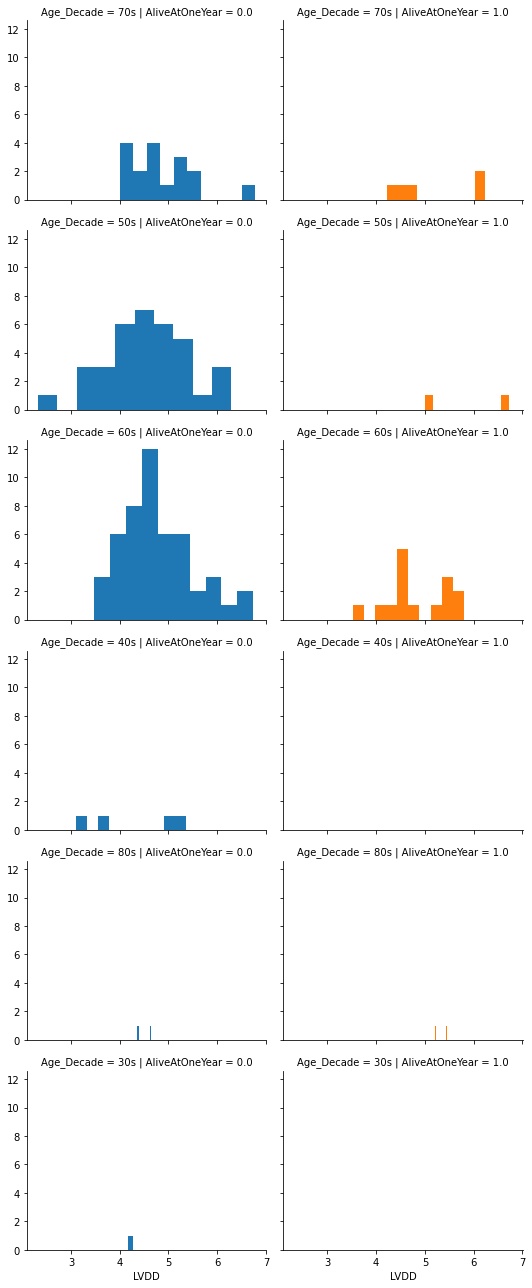

In [12]:
## Facet Plot: LVDD by Age of Heart Attack and Alive at One Year 

g = sns.FacetGrid(Echo, 
                  col="AliveAtOneYear", 
                  row='Age_Decade', 
                  hue="AliveAtOneYear",
                  aspect = 1.25
                 )

g = g.map(plt.hist, "LVDD")
g.set_axis_labels("LVDD")

## Solution

Many visualizations were created for the assignment, but there were many findings regarding the attribute as a result.

First, there are 12 useable attributes and 132 rows - or distinct patients who have experienced a heart attack. Of these 132 patients, more than half are 50 years or older and over 100 were not alive a year after their heart attack. Knowing these statistics helps frame the other findings.

One attribute, fractional shortening, measures the contractility of the heart and lower values tend to be abnormal. For patients who did not live to a year, the mean fractional shortening was slightly above 0.2. For patients who were alive a year after, had a mean fractional shortening slightly below 0.2. This may indicate that fractional shortening may not be a strong indicator or survivability. This result is shown in the boxplot created above. 

The attribute EPSS is another measure of contractility of the heart, and higher values are more abnormal. In the box plot created, it shows a mean EPSS of 11 for patients who did not survive, and a mean of 13 for patients who did survive. The IQR for patients who survives is higher than for the patients who did not survive. This result shows that EPSS may not be a strong indicator for whether a patient lives a year after their heart attack. 

In the scatter plot created for patient Age at heart attack, it shows that patients who did not survive had an age mostly between 60 to 70. For patients who did survive, the age range was more narrow, with most patients being closer to 60 years old. 

For Wall Motion Index, 1.0 is considered normal and 3.0 is considered abnormal. In the scatter plot created, it appears that most patients who did not survive a year from their heart attack were mostly in the 1.0-2.0  range. For patients who did survive, the range was mostly 1.25-1.75. Wall Motion Index may have some influence in determining a patient’s survivability. 

Lastly, the face grid plot created measures LVDD by a patients age and whether they were alive a year later.
LVDD is measure of the patient’s heart - specifically left ventricular end-diastolic dimension, and larger LVDD tend to be sicker hearts. The mean LVDD for all patients was 4.75, and most values do tend sit around the mean for both alive and expired patients. 
